<a href="https://colab.research.google.com/github/SaishWarule1116/LangGraph-Experiments/blob/main/1_first_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 16.6 MB/s eta 0:00:00


In [2]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [3]:
# Define State

class BMIState(TypedDict):
    weight: float
    height_m : float
    bmi: float
    category: str

In [4]:
# BMI calculator

def Calculate_bmi(state: BMIState) -> BMIState:
    state['bmi'] = state['weight'] / (state['height_m'] ** 2)
    return state


In [5]:
def label_bmi(state: BMIState) -> BMIState:
    if state['bmi'] < 18.5:
        state['category'] = 'Underweight'
    elif state['bmi'] < 25:
        state['category'] = 'Normal'
    elif state['bmi'] < 30:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obese'
    return state

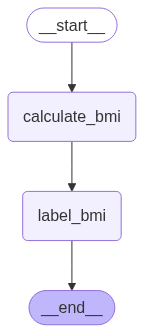

In [6]:
# create Object of Stategraph
graph = StateGraph(BMIState)

# add node

graph.add_node('calculate_bmi',Calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# add Edges

graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','label_bmi')
graph.add_edge('label_bmi',END)

# compile the graph

workflow = graph.compile()
workflow

In [7]:
# Execute Graph

initial_state = {'weight':80,'height_m': 1.30}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight': 80, 'height_m': 1.3, 'bmi': 47.33727810650887, 'category': 'Obese'}
